# How to Access Different Form Factors and Rates

In this notebook we give an example for different form factor parameterizations and how to use them for B to Pseudoscalar and B to Vector $b \to c$ transitions.
This will be a basic instructions and only concern itself with central values. 

In [1]:
from effort2.rates.BtoP import BtoP
from effort2.rates.BtoV import BtoV

from effort2.formfactors.BGL import BToDBGL, BToDStarBGL
from effort2.formfactors.CLN import BToDCLN, BToDStarCLN

import numpy as np
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp

## Setting Up 

* We will require the masses of the contributing $B$, $D^*$, and $D$ mesons. We work with zero lepton masses, which is the default for effort. Non-zero lepton masses will be explored in a different notebook.

* We will look at the CLN and BGL form factor parameterizations. Please note that the chosen values for the form factors might be outdated, and only serve for an explanatory purpose.

* We will look at $B \to P$ and $B \to V$ transitions.

In [2]:
m_Bzero = 5.27963
m_Dstarplus = 2.01026
m_Dplus = 1.86999

In [3]:
myBToDCLN = BToDCLN(
    m_B=m_Bzero,
    m_P=m_Dplus, 
    G_1 = 1.074,
    rho2 = 1.15,
)

myBToDBGL = BToDBGL(
    m_B=m_Bzero,
    m_P=m_Dplus,
    exp_coeff_plus = [0.0126, -0.094, 0.34, -0.1], 
    exp_coeff_zero = [0.0115, -0.057, 0.12, 0.4], 
)

rate_D_CLN = BtoP(myBToDCLN, Vxb=40e-3, eta_EW=1.0066)
rate_D_BGL = BtoP(myBToDBGL, Vxb=40e-3, eta_EW=1.0066)

In [4]:
myBToDStarCLN = BToDStarCLN(
    m_B=m_Bzero,
    m_V=m_Dstarplus,
    h_A1_1 = 0.906,
    rho2 = 1.3,
    R1_1 = 1.18,
    R2_1 = 0.71,
)


myBToDStarBGL = BToDStarBGL(
    m_B=m_Bzero,
    m_V=m_Dstarplus,
    exp_coeff_a = [0.02596, -0.06049, 0], 
    exp_coeff_b = [0.01311,  0.01713, 0], 
    exp_coeff_c = [0.00753, -0.09346, 0], 
)

rate_Dstar_CLN = BtoV(myBToDStarCLN, Vxb=40e-3, eta_EW=1.0066)
rate_Dstar_BGL = BtoV(myBToDStarBGL, Vxb=40e-3, eta_EW=1.0066)

## Plotting

In [5]:
def add_watermark(
    ax,
    t: str = None,
    logo: str = "Belle",
    px: float = 0.033,
    py: float = 1.022, #0.915,
    fontsize: int = 10,
    alpha_logo=1,
    shift: float = 0.15,
    bstyle: str = "normal",
    *args,
    **kwargs,
):
    ax.text(px, py, logo, ha="left", transform=ax.transAxes, fontsize=fontsize, style=bstyle, alpha=alpha_logo, weight="bold", *args, **kwargs,)
    ax.text(px + shift, py, t, ha="left", transform=ax.transAxes, fontsize=fontsize, alpha=alpha_logo, *args, **kwargs,)

NameError: name 'unp' is not defined

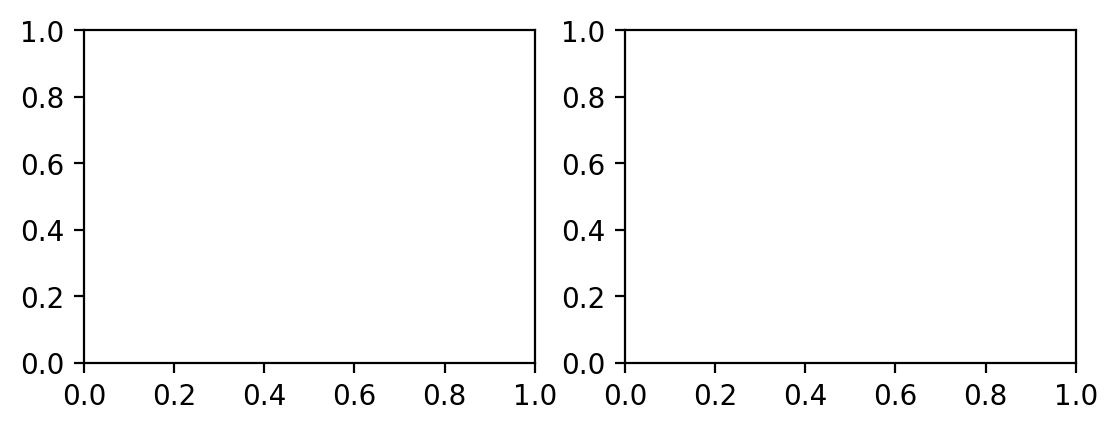

In [6]:
w_range = np.linspace(*rate_D_CLN.kinematics.w_range_numerical_stable)
cosL_range = np.linspace(*rate_D_CLN.kinematics.cosL_range)
cosV_range = np.linspace(*rate_D_CLN.kinematics.cosV_range)
chi_range = np.linspace(*rate_D_CLN.kinematics.chi_range)

total_rate = rate_D_CLN.Gamma()
w_rate     = [rate_D_CLN.dGamma_dw(w) / total_rate    * (max(w_range) - min(w_range))       for w in w_range]
cosL_rate  = [rate_D_CLN.dGamma_dcosL(w) / total_rate * (max(cosL_range) - min(cosL_range)) for w in cosL_range]

total_rate2 = rate_D_BGL.Gamma()
w_rate2     = [rate_D_BGL.dGamma_dw(w) / total_rate2    * (max(w_range) - min(w_range))       for w in w_range]
cosL_rate2  = [rate_D_BGL.dGamma_dcosL(w) / total_rate2 * (max(cosL_range) - min(cosL_range)) for w in cosL_range]

fig, ax = plt.subplots(dpi=200, figsize=(6.4, 2.2), nrows=1, ncols=2, sharex=False, sharey=False)

ax[0].plot(w_range, unp.nominal_values(w_rate), color="tab:orange", label="CLN", ls="solid")
ax[1].plot(cosL_range, unp.nominal_values(cosL_rate), color="tab:orange", ls="solid")

ax[0].plot(w_range, unp.nominal_values(w_rate2), color="tab:blue", label=r"BGL$_{444}$?", ls="dashed")
ax[1].plot(cosL_range, unp.nominal_values(cosL_rate2), color="tab:blue", ls="dashed")

ax[0].set_xlim(1, max(w_range))
ax[1].set_xlim(min(cosL_range), max(cosL_range))

ax[0].set_ylim(0, 2)
ax[1].set_ylim(0, 2)

ax[0].set_xlabel(r"$w$ [1]")
ax[1].set_xlabel(r"$\cos\theta_\ell$ [1]")

ax[0].set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}w$")
ax[1].set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}\cos\theta_\ell$")

ax[0].legend(loc="upper left", frameon=False, fontsize="x-small", ncol=1)

add_watermark(ax[0], logo=r"$B \to D \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)
add_watermark(ax[1], logo=r"$B \to D \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
w_range = np.linspace(*rate_Dstar_CLN.kinematics.w_range_numerical_stable)
cosL_range = np.linspace(*rate_Dstar_CLN.kinematics.cosL_range)
cosV_range = np.linspace(*rate_Dstar_CLN.kinematics.cosV_range)
chi_range = np.linspace(*rate_Dstar_CLN.kinematics.chi_range)

total_rate = rate_Dstar_CLN.Gamma()
w_rate     = [rate_Dstar_CLN.dGamma_dw(w) / total_rate    * (max(w_range) - min(w_range))       for w in w_range]
cosL_rate  = [rate_Dstar_CLN.dGamma_dcosL(w) / total_rate * (max(cosL_range) - min(cosL_range)) for w in cosL_range]
cosV_rate  = [rate_Dstar_CLN.dGamma_dcosV(w) / total_rate * (max(cosV_range) - min(cosV_range)) for w in cosV_range]
chi_rate   = [rate_Dstar_CLN.dGamma_dchi(w) / total_rate  * (max(chi_range) - min(chi_range))   for w in chi_range]

total_rate2 = rate_Dstar_BGL.Gamma()
w_rate2     = [rate_Dstar_BGL.dGamma_dw(w) / total_rate2    * (max(w_range) - min(w_range))       for w in w_range]
cosL_rate2  = [rate_Dstar_BGL.dGamma_dcosL(w) / total_rate2 * (max(cosL_range) - min(cosL_range)) for w in cosL_range]
cosV_rate2  = [rate_Dstar_BGL.dGamma_dcosV(w) / total_rate2 * (max(cosV_range) - min(cosV_range)) for w in cosV_range]
chi_rate2   = [rate_Dstar_BGL.dGamma_dchi(w) / total_rate2  * (max(chi_range) - min(chi_range))   for w in chi_range]

fig, ax = plt.subplots(dpi=200, figsize=(6.4, 4.4), nrows=2, ncols=2, sharex=False, sharey=False)

ax[0, 0].plot(w_range, unp.nominal_values(w_rate), color="tab:orange", label="CLN", ls="solid")
ax[0, 1].plot(cosL_range, unp.nominal_values(cosL_rate), color="tab:orange", ls="solid")
ax[1, 0].plot(cosV_range, unp.nominal_values(cosV_rate), color="tab:orange", ls="solid")
ax[1, 1].plot(chi_range, unp.nominal_values(chi_rate), color="tab:orange", ls="solid")

ax[0, 0].plot(w_range, unp.nominal_values(w_rate2), color="tab:blue", label="BGL$_{222}$", ls="dashed")
ax[0, 1].plot(cosL_range, unp.nominal_values(cosL_rate2), color="tab:blue", ls="dashed")
ax[1, 0].plot(cosV_range, unp.nominal_values(cosV_rate2), color="tab:blue", ls="dashed")
ax[1, 1].plot(chi_range, unp.nominal_values(chi_rate2), color="tab:blue", ls="dashed")

ax[0, 0].set_xlim(1, max(w_range))
ax[0, 1].set_xlim(min(cosL_range), max(cosL_range))
ax[1, 0].set_xlim(min(cosV_range), max(cosV_range))
ax[1, 1].set_xlim(min(chi_range), max(chi_range))

ax[0, 0].set_ylim(0, 2)
ax[0, 1].set_ylim(0, 2)
ax[1, 0].set_ylim(0, 2)
ax[1, 1].set_ylim(0, 2)

ax[0, 0].set_xlabel(r"$w$ [1]")
ax[0, 1].set_xlabel(r"$\cos\theta_\ell$ [1]")
ax[1, 0].set_xlabel(r"$\cos\theta_V$ [1]")
ax[1, 1].set_xlabel(r"$\chi$ [rad]")

ax[0, 0].set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}w$")
ax[0, 1].set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}\cos\theta_\ell$")
ax[1, 0].set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}\cos\theta_V$")
ax[1, 1].set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}\chi$")

ax[0, 0].legend(loc="upper left", frameon=False, fontsize="x-small", ncol=1)

add_watermark(ax[0, 0], logo=r"$B \to D^* \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)
add_watermark(ax[0, 1], logo=r"$B \to D^* \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)
add_watermark(ax[1, 0], logo=r"$B \to D^* \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)
add_watermark(ax[1, 1], logo=r"$B \to D^* \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
w_range = np.linspace(*rate_D_CLN.kinematics.w_range_numerical_stable)

fplus = [myBToDCLN.fplus(w) for w in w_range]
fzero = [myBToDCLN.fzero(w) for w in w_range]

fplus_2 = [myBToDBGL.fplus(w) for w in w_range]
fzero_2 = [myBToDBGL.fzero(w) for w in w_range]

fig, ax = plt.subplots(dpi=200, figsize=(6.4, 2.2), nrows=1, ncols=2, sharex=False, sharey=False)

ax[0].plot(w_range, unp.nominal_values(fplus), color="tab:orange", label="CLN", ls="solid")
ax[1].plot(w_range, unp.nominal_values(fzero), color="tab:orange", ls="dashed")

ax[0].plot(w_range, unp.nominal_values(fplus_2), color="tab:blue", label=r"BGL$_{444}?$", ls="dashed")
ax[1].plot(w_range, unp.nominal_values(fzero_2), color="tab:blue", ls="dashed")

ax[0].set_xlim(1, max(w_range))
ax[1].set_xlim(1, max(w_range))

ax[0].set_ylim(0, 2)
ax[1].set_ylim(0, 2)

ax[0].set_xlabel(r"$w$ [1]")
ax[1].set_xlabel(r"$w$ [1]")

ax[0].set_ylabel(r"$f_+(w)$")
ax[1].set_ylabel(r"$f_0(w)$")

ax[0].legend(loc="upper left", frameon=False, fontsize="x-small", ncol=1)

add_watermark(ax[0], logo=r"$B \to D \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)
add_watermark(ax[1], logo=r"$B \to D \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
w_range = np.linspace(*rate_Dstar_CLN.kinematics.w_range_numerical_stable)

hA1 = [myBToDStarCLN.h_A1(w) for w in w_range]
R0  = [myBToDStarCLN.R0(w) for w in w_range]
R1  = [myBToDStarCLN.R1(w) for w in w_range]
R2  = [myBToDStarCLN.R2(w) for w in w_range]

hA1_2 = [myBToDStarBGL.h_A1(w) for w in w_range]
R0_2  = [myBToDStarBGL.R0(w) for w in w_range]
R1_2  = [myBToDStarBGL.R1(w) for w in w_range]
R2_2  = [myBToDStarBGL.R2(w) for w in w_range]

fig, ax = plt.subplots(dpi=200, figsize=(6.4, 4.2), nrows=2, ncols=2, sharex=False, sharey=False)

ax[0, 0].plot(w_range, unp.nominal_values(hA1), color="tab:orange", label="CLN", ls="solid")
ax[0, 1].plot(w_range, unp.nominal_values(R0 ), color="tab:orange", ls="solid")
ax[1, 0].plot(w_range, unp.nominal_values(R1 ), color="tab:orange", ls="solid")
ax[1, 1].plot(w_range, unp.nominal_values(R2 ), color="tab:orange", ls="solid")

ax[0, 0].plot(w_range, unp.nominal_values(hA1_2), color="tab:blue", label=r"BGL$_{222}$", ls="dashed")
ax[0, 1].plot(w_range, unp.nominal_values(R0_2 ), color="tab:blue", ls="dashed")
ax[1, 0].plot(w_range, unp.nominal_values(R1_2 ), color="tab:blue", ls="dashed")
ax[1, 1].plot(w_range, unp.nominal_values(R2_2 ), color="tab:blue", ls="dashed")

ax[0, 0].set_xlim(1, max(w_range))
ax[0, 1].set_xlim(1, max(w_range))
ax[1, 0].set_xlim(1, max(w_range))
ax[1, 1].set_xlim(1, max(w_range))

ax[0, 0].set_ylim(0, 2)
ax[0, 1].set_ylim(0, 2)
ax[1, 0].set_ylim(0, 2)
ax[1, 1].set_ylim(0, 2)

ax[0, 0].set_xlabel(r"$w$ [1]")
ax[0, 1].set_xlabel(r"$w$ [1]")
ax[1, 0].set_xlabel(r"$w$ [1]")
ax[1, 1].set_xlabel(r"$w$ [1]")

ax[0, 0].set_ylabel(r"$h_{A_1}(w)$")
ax[0, 1].set_ylabel(r"$R_0(w)$")
ax[1, 0].set_ylabel(r"$R_1(w)$")
ax[1, 1].set_ylabel(r"$R_2(w)$")

ax[0, 0].legend(loc="upper left", frameon=False, fontsize="x-small", ncol=1)

add_watermark(ax[0, 0], logo=r"$B \to D^* \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)
add_watermark(ax[0, 1], logo=r"$B \to D^* \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)
add_watermark(ax[1, 0], logo=r"$B \to D^* \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)
add_watermark(ax[1, 1], logo=r"$B \to D^* \ell \bar{\nu}_\ell$", px=0.01, py=1.05, fontsize=8)

plt.tight_layout()
plt.show()
plt.close()